In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('master_list_2697049_mhcii.tsv', sep = '\t')
df

,allele,seq_num,start,end,length,core_peptide,peptide,iedb_aff,rank,protein_id,...,protein_sequence,antigen_score,probable_type,population_coverage,genot_freq,genot_freq_sum_per_epitope,pair_aff_score,aff_score,imm_score,rank_score
0,HLA-DRB1*07:01,1.0,896,910,15,FAMQMAYRF,IPFAMQMAYRFNGIG,40.37,2.8,P0DTC2,...,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1.2828,ANTIGEN,0.9561,13.08,82.17,0.146330,0.846034,0.58645,0.801178
1,HLA-DRB1*08:02,1.0,896,910,15,MQMAYRFNG,IPFAMQMAYRFNGIG,190.01,4.1,P0DTC2,...,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1.2828,ANTIGEN,0.9561,0.22,82.17,0.001660,0.846034,0.58645,0.801178
2,HLA-DRB1*14:06,1.0,896,910,15,MQMAYRFNG,IPFAMQMAYRFNGIG,56.89,2.2,P0DTC2,...,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1.2828,ANTIGEN,0.9561,0.02,82.17,0.000216,0.846034,0.58645,0.801178
3,HLA-DRB1*14:02,1.0,896,910,15,MQMAYRFNG,IPFAMQMAYRFNGIG,166.40,2.8,P0DTC2,...,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1.2828,ANTIGEN,0.9561,0.32,82.17,0.002598,0.846034,0.58645,0.801178
4,HLA-DRB1*15:01,1.0,896,910,15,FAMQMAYRF,IPFAMQMAYRFNGIG,64.50,3.4,P0DTC2,...,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1.2828,ANTIGEN,0.9561,11.05,82.17,0.117130,0.846034,0.58645,0.801178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64607,HLA-DQA1*03:03/DQB1*03:01,3.0,116,130,15,PEAGLPYGA,GPEAGLPYGANKDGI,216.73,4.6,P0DTC9,...,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...,0.0000,NON-ANTIGEN,0.0000,0.00,0.00,NaN,0.000000,0.00000,0.000000
64608,HLA-DQA1*05:01/DQB1*03:01,3.0,116,130,15,PEAGLPYGA,GPEAGLPYGANKDGI,36.28,1.5,P0DTC9,...,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...,0.0000,NON-ANTIGEN,0.0000,0.00,0.00,NaN,0.000000,0.00000,0.000000
64609,HLA-DQA1*06:01/DQB1*03:01,3.0,116,130,15,PEAGLPYGA,GPEAGLPYGANKDGI,139.73,3.6,P0DTC9,...,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...,0.0000,NON-ANTIGEN,0.0000,0.00,0.00,NaN,0.000000,0.00000,0.000000
64610,HLA-DQA1*05:05/DQB1*03:01,3.0,117,131,15,PEAGLPYGA,PEAGLPYGANKDGII,92.48,5.0,P0DTC9,...,MSDNGPQNQRNAPRITFGGPSDSTGSNQNGERSGARSKQRRPQGLP...,0.0000,NON-ANTIGEN,0.0000,0.00,0.00,NaN,0.000000,0.00000,0.000000


In [13]:
df.columns

#one-to-one relationship: iedb_aff-aff_score, 

Index(['allele', 'seq_num', 'start', 'end', 'length', 'core_peptide',
       'peptide', 'iedb_aff', 'rank', 'protein_id', 'number_binding_alleles',
       'protein_sequence', 'antigen_score', 'probable_type',
       'population_coverage', 'genot_freq', 'genot_freq_sum_per_epitope',
       'pair_aff_score', 'aff_score', 'imm_score', 'rank_score'],
      dtype='object')

<AxesSubplot: xlabel='genot_freq', ylabel='genot_freq_sum_per_epitope'>

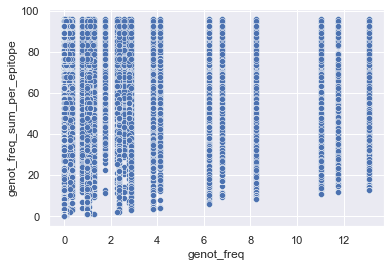

In [16]:
#checking relationship
#g_freq_sum~pop_freq
sns.scatterplot(x=df['genot_freq'], y=df['genot_freq_sum_per_epitope'])

In [3]:
def binding_alleles_range(number):
    if number == 1:
        return '1'
    elif number == 2:
        return '2'
    elif number >= 3 and number <= 10:
        return '3-10'
    elif number >= 11 and number <= 20:
        return '11-20'
    elif number >= 21 and number <= 30:
        return '21-30'
    elif number >= 31 and number <= 40:
        return '31-40'
    elif number >= 41 and number <= 50:
        return '41-50'
    else:
        return '50+'
    
df['binding_alleles_range'] = df['number_binding_alleles'].apply(binding_alleles_range)
df.head()

,allele,seq_num,start,end,length,core_peptide,peptide,iedb_aff,rank,protein_id,...,antigen_score,probable_type,population_coverage,genot_freq,genot_freq_sum_per_epitope,pair_aff_score,aff_score,imm_score,rank_score,binding_alleles_range
0,HLA-DRB1*07:01,1.0,896,910,15,FAMQMAYRF,IPFAMQMAYRFNGIG,40.37,2.8,P0DTC2,...,1.2828,ANTIGEN,0.9561,13.08,82.17,0.146330,0.846034,0.58645,0.801178,41-50
1,HLA-DRB1*08:02,1.0,896,910,15,MQMAYRFNG,IPFAMQMAYRFNGIG,190.01,4.1,P0DTC2,...,1.2828,ANTIGEN,0.9561,0.22,82.17,0.001660,0.846034,0.58645,0.801178,41-50
2,HLA-DRB1*14:06,1.0,896,910,15,MQMAYRFNG,IPFAMQMAYRFNGIG,56.89,2.2,P0DTC2,...,1.2828,ANTIGEN,0.9561,0.02,82.17,0.000216,0.846034,0.58645,0.801178,41-50
3,HLA-DRB1*14:02,1.0,896,910,15,MQMAYRFNG,IPFAMQMAYRFNGIG,166.40,2.8,P0DTC2,...,1.2828,ANTIGEN,0.9561,0.32,82.17,0.002598,0.846034,0.58645,0.801178,41-50
4,HLA-DRB1*15:01,1.0,896,910,15,FAMQMAYRF,IPFAMQMAYRFNGIG,64.50,3.4,P0DTC2,...,1.2828,ANTIGEN,0.9561,11.05,82.17,0.117130,0.846034,0.58645,0.801178,41-50


In [4]:
x= df.groupby(by=['peptide'])['pair_aff_score'].median()
df2= pd.merge(df, x, how='inner', left_on = 'peptide', right_on = 'peptide')
df2.rename(columns={'pair_aff_score_y':'median_pair_aff_score_epi'}, inplace=True)

<AxesSubplot:xlabel='median_pair_aff_score_epi', ylabel='aff_score'>

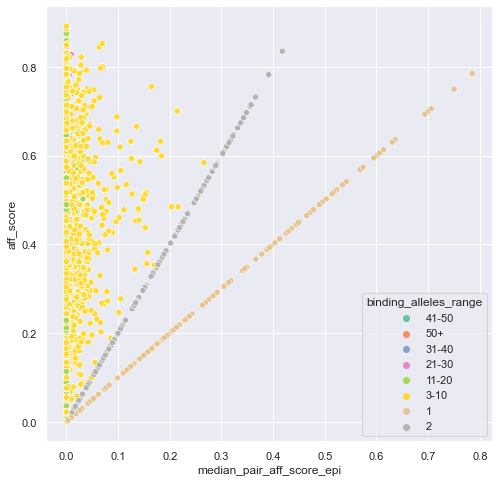

In [5]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = df2, x ='median_pair_aff_score_epi', y = 'aff_score', hue = 'binding_alleles_range', palette = 'Set2')

<AxesSubplot: xlabel='population_coverage', ylabel='aff_score'>

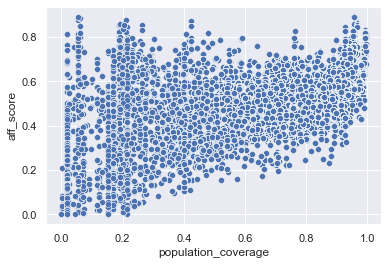

In [18]:
sns.scatterplot(x=df['population_coverage'], y=df['aff_score'])

<AxesSubplot: xlabel='rank', ylabel='rank_score'>

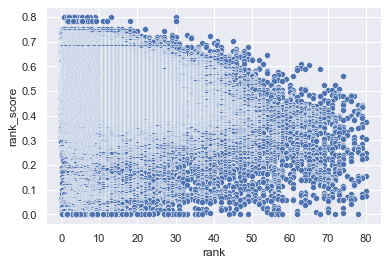

In [26]:
#checking the relationship
sns.scatterplot(x=df['rank'], y=df['rank_score'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64612 entries, 0 to 64611
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0    allele                     64612 non-null  object 
 1   seq_num                     64612 non-null  float64
 2   start                       64612 non-null  int64  
 3   end                         64612 non-null  int64  
 4   length                      64612 non-null  int64  
 5   core_peptide                64612 non-null  object 
 6   peptide                     64612 non-null  object 
 7   iedb_aff                    64612 non-null  float64
 8   rank                        64612 non-null  float64
 9   protein_id                  64612 non-null  object 
 10  number_binding_alleles      64612 non-null  int64  
 11  protein_sequence            64612 non-null  object 
 12  antigen_score               64612 non-null  float64
 13  probable_type               646

In [4]:
df.isnull().sum()

 allele                          0
seq_num                          0
start                            0
end                              0
length                           0
core_peptide                     0
peptide                          0
iedb_aff                         0
rank                             0
protein_id                       0
number_binding_alleles           0
protein_sequence                 0
antigen_score                    0
probable_type                    0
population_coverage              0
genot_freq                       0
genot_freq_sum_per_epitope       0
pair_aff_score                2113
aff_score                        0
imm_score                        0
rank_score                       0
dtype: int64

In [5]:
len(df[' allele'].unique())

82

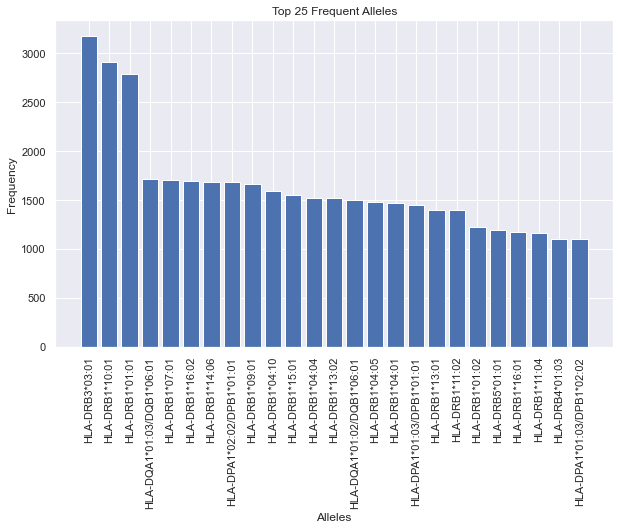

In [6]:
#IMPORTANT
top_alleles = df[' allele'].value_counts().head(25)

# Create the bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(top_alleles.index, top_alleles.values)
plt.title('Top 25 Frequent Alleles')
plt.xlabel('Alleles')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

### HLA-DRB3*03:01 , HLA-DRB1*10:01, HLA-DRB1*01:01 are the top 3 frequently occuring alleles

In [7]:
len(df['number_binding_alleles'].unique())

62

### Top 20 Number of bindings that most of the peptides are having

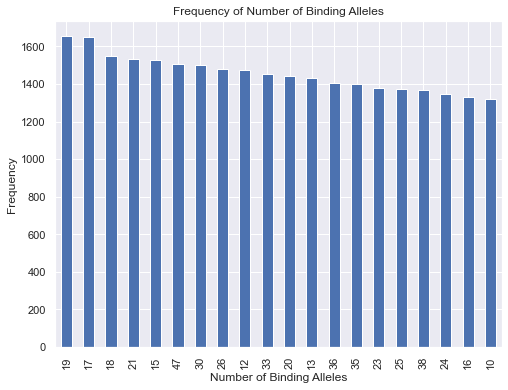

In [8]:
freq = df['number_binding_alleles'].value_counts().head(20)

# Plot a bar graph of the frequency of number of binding alleles
plt.figure(figsize=(8,6))
freq.plot(kind='bar')
plt.title('Frequency of Number of Binding Alleles')
plt.xlabel('Number of Binding Alleles')
plt.ylabel('Frequency')
plt.show()

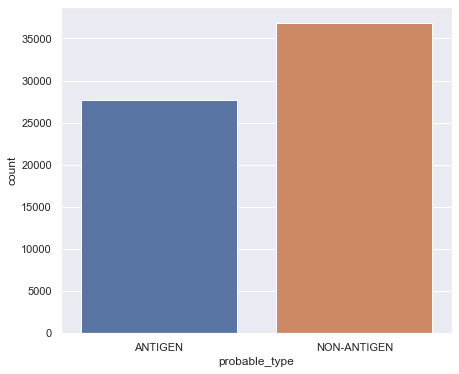

In [9]:
plt.figure(figsize = (7, 6))
sns.countplot(x = 'probable_type', data = df)
plt.show()

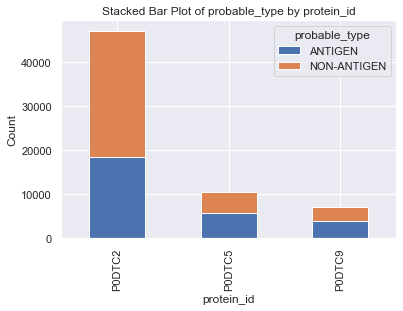

In [10]:
grouped = df.groupby(['protein_id', 'probable_type']).size().reset_index(name='count')
pivot = grouped.pivot(index='protein_id', columns='probable_type', values='count')
ax = pivot.plot(kind='bar', stacked=True)
ax.set_xlabel('protein_id')
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Plot of probable_type by protein_id')

# Show the plot
plt.show()

<AxesSubplot:xlabel='length', ylabel='count'>

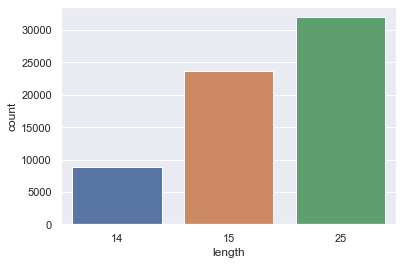

In [11]:
#IMPORTANT
sns.countplot(x = 'length', data = df)

### Most of the peptides having their length as 25

<AxesSubplot:>

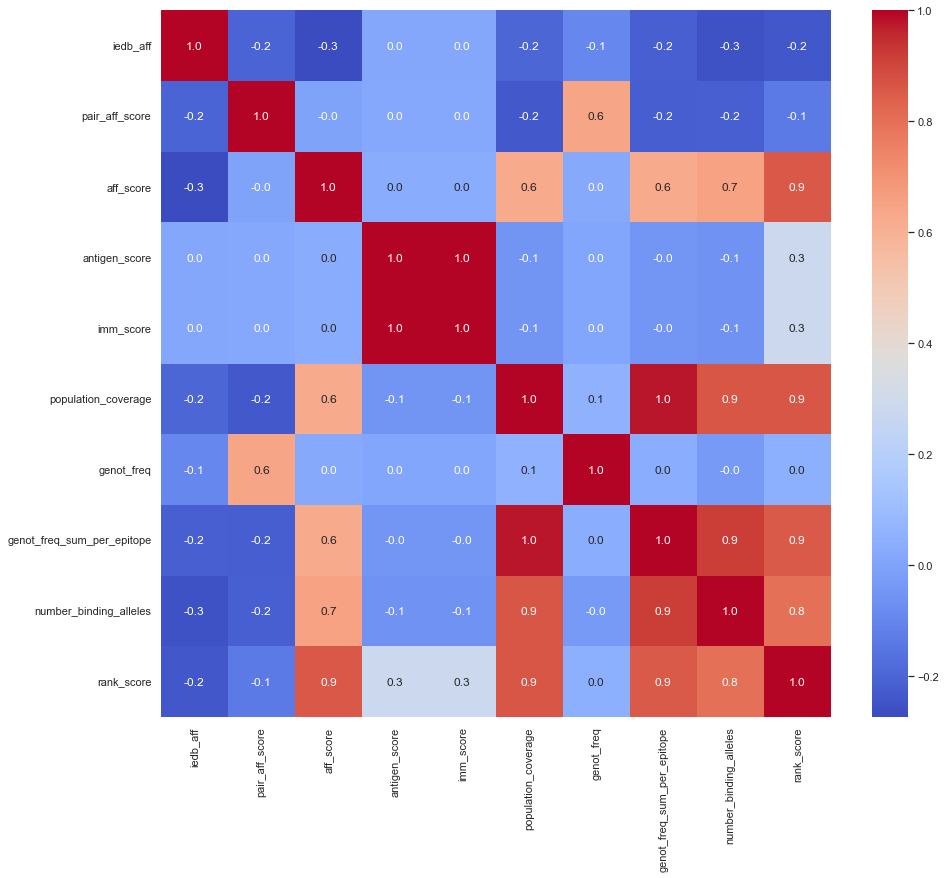

In [12]:
#IMPORTANT -added on heatmap slide
num_features = ['iedb_aff', 'pair_aff_score',  'aff_score', 'antigen_score',  'imm_score', 'population_coverage', 'genot_freq', 'genot_freq_sum_per_epitope' ,'number_binding_alleles', 'rank_score']
correlation = df[num_features].corr()
plt.figure(figsize = (15, 13))
sns.heatmap(data = correlation, cmap = 'coolwarm', annot = True, fmt = '.1f')

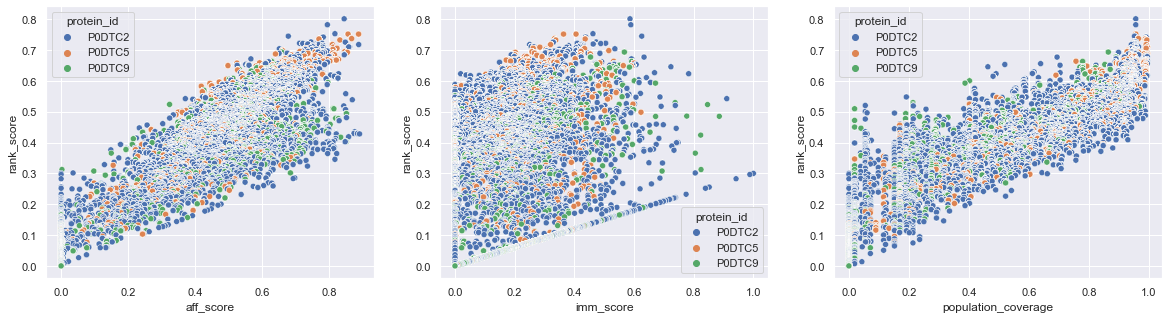

In [44]:
#IMPORTANT - added on heatmap slide
calc_scores = ['aff_score', 'imm_score', 'population_coverage']

fig, axes = plt.subplots(1, 3, figsize = (20, 5)) 

for param, ax in zip(calc_scores, axes.flatten()):
    sns.scatterplot(data = df, x =param, y = 'rank_score', hue = 'protein_id', ax = ax)
    
#last 2 are NOT inc. in rank formula, thus no clear relationship (antigen_score = imm_score)
#'genot_freq_sum_per_epitope'~aff_score

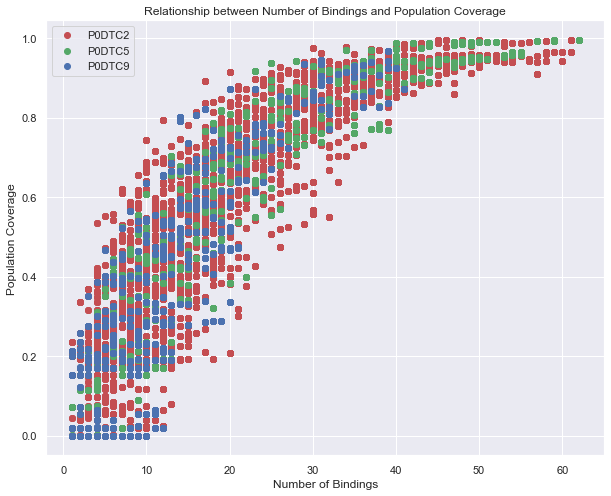

In [42]:
#IMPORTANT
fig, ax = plt.subplots(figsize=(10, 8))
hue_col = 'protein_id' # change this to the column you want to use as hue
colors = ['r', 'g', 'b', 'y'] # add more colors as needed
hue_levels = sorted(list(set(df[hue_col])))
for i, level in enumerate(hue_levels):
    subset_df = df[df[hue_col]==level]
    ax.scatter(subset_df['number_binding_alleles'], subset_df['population_coverage'], color=colors[i], label=level)
plt.xlabel('Number of Bindings')
plt.ylabel('Population Coverage')
plt.title('Relationship between Number of Bindings and Population Coverage')
plt.legend()
plt.show()

<AxesSubplot:xlabel='number_binding_alleles', ylabel='genot_freq_sum_per_epitope'>

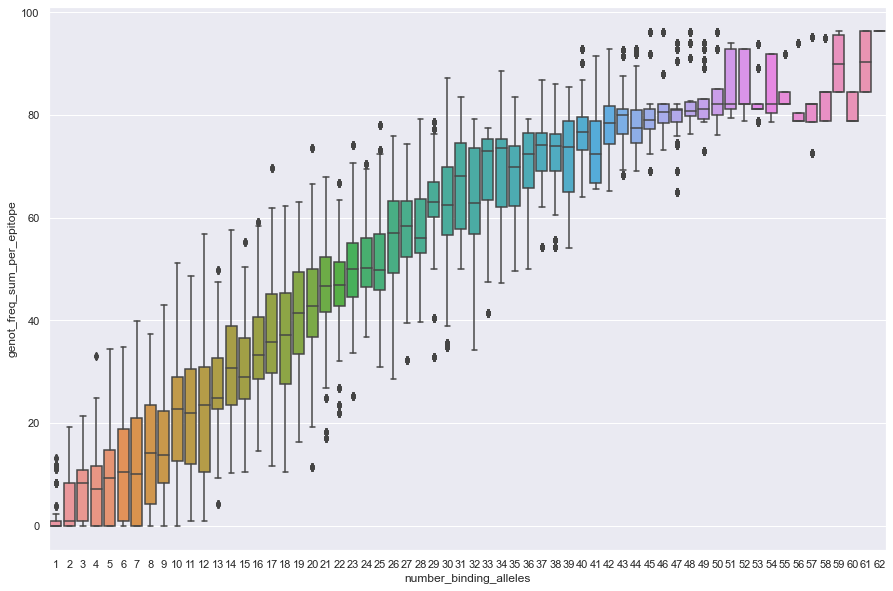

In [6]:
#IMPORTANT - added on population coverage slide
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'number_binding_alleles', y = 'genot_freq_sum_per_epitope', data = df)

<AxesSubplot: xlabel='population_coverage', ylabel='genot_freq_sum_per_epitope'>

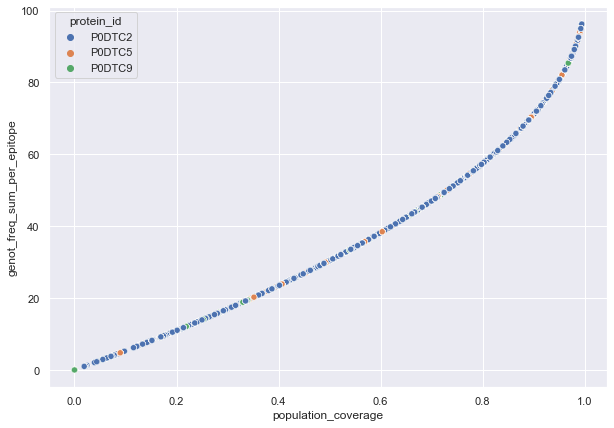

In [36]:
#IMPORTANT - added on population coverage slide
plt.figure(figsize = (10, 12))
sns.scatterplot(data = df, x = 'population_coverage', y = 'genot_freq_sum_per_epitope', hue = 'protein_id')
#non-linear relationship

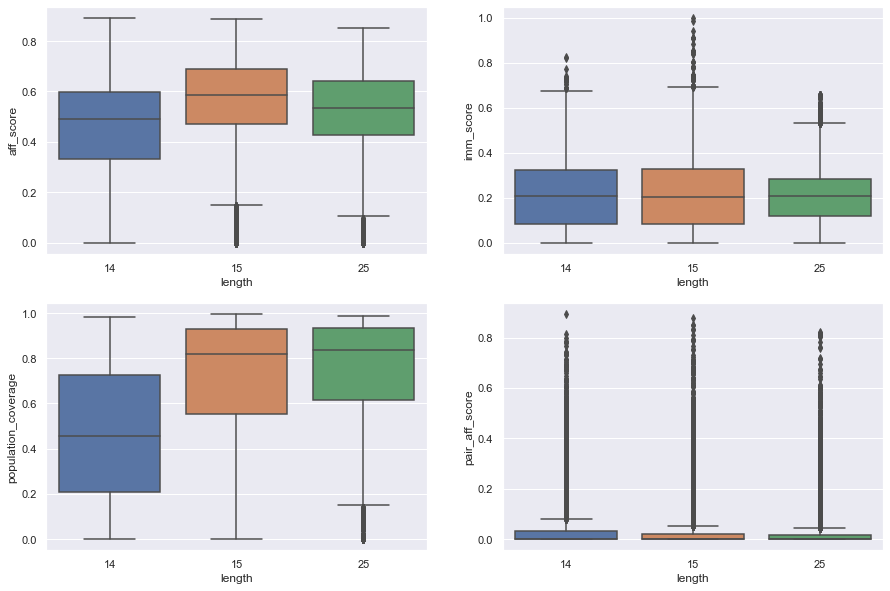

In [38]:
#IMPORTANT - added on impact of length slide
#important -- longer epitopes have higher pop_coverage
fig, axes = plt.subplots(2,2, figsize = (15, 10)) 

for param, ax in zip(calc_scores, axes.flatten()):
    sns.boxplot(data=df, x='length', y=param, ax = ax)
#the length matters mostly for pop_coverage  

<AxesSubplot:xlabel='length', ylabel='rank_score'>

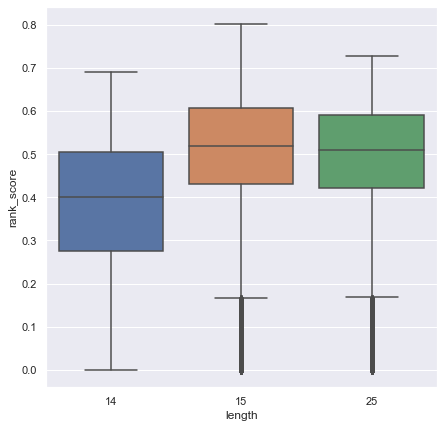

In [17]:
#IMPORTANT - added on impact of length slide
plt.figure(figsize = (7,7))
sns.boxplot(data=df, x='length', y='rank_score')

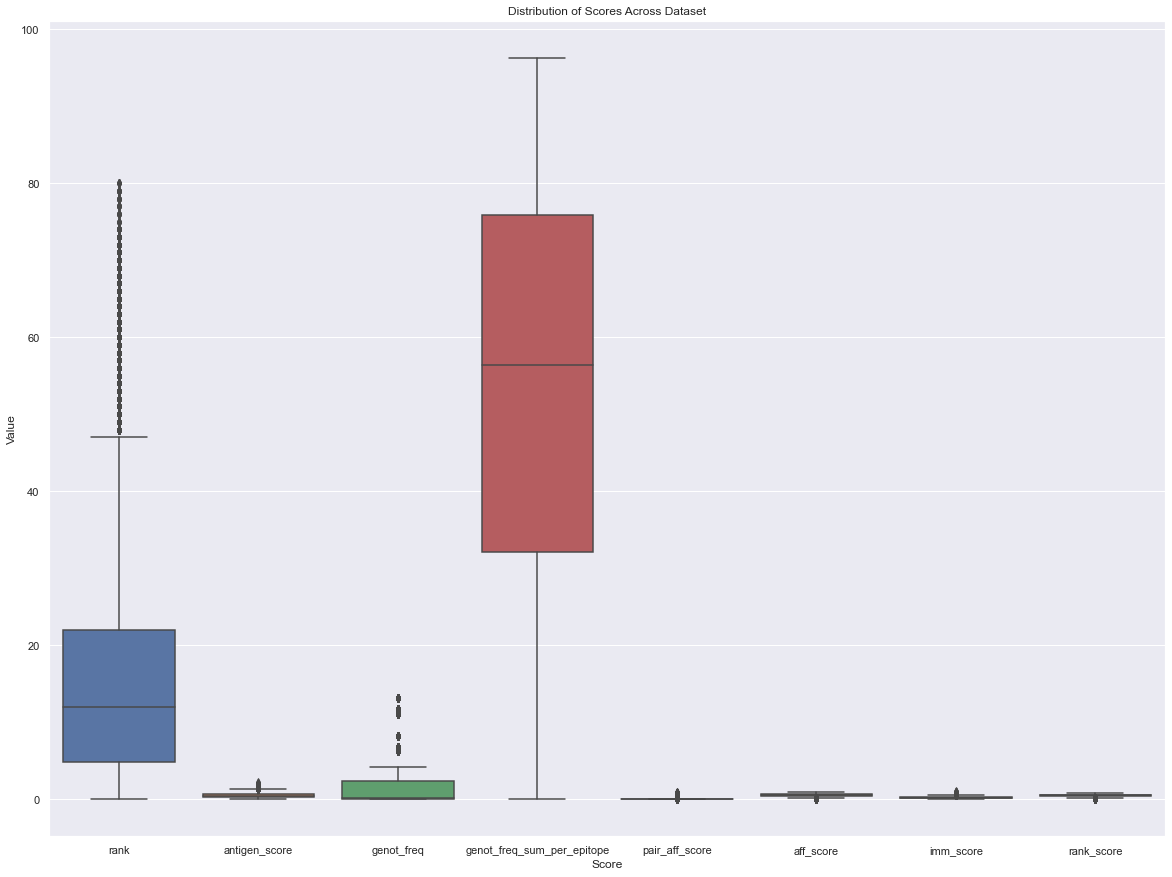

In [23]:
#not important
plt.figure(figsize = (20,15))
# Create the boxplot
sns.boxplot(data=df[['core_peptide', 'rank', 'antigen_score', 'genot_freq', 'genot_freq_sum_per_epitope',
                     'pair_aff_score', 'aff_score', 'imm_score', 'rank_score']])

# Set the title and labels
plt.title("Distribution of Scores Across Dataset")
plt.xlabel("Score")
plt.ylabel("Value")

# Show the plot
plt.show()

#excluded iedb - as 

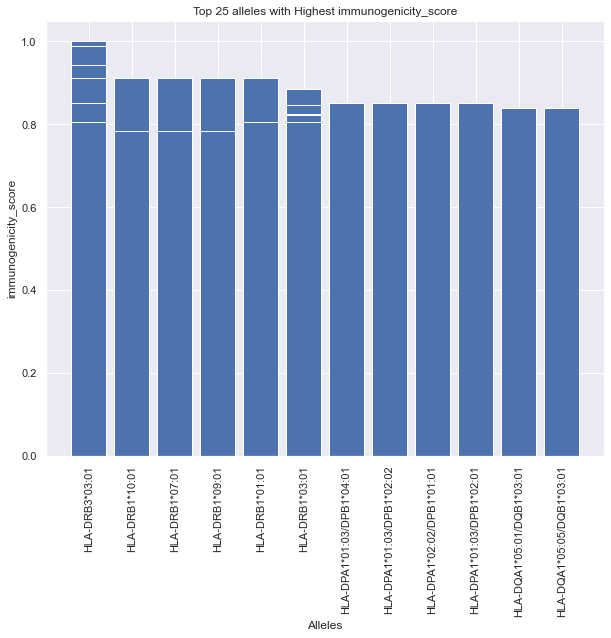

In [22]:
sorted_data = df.sort_values('imm_score', ascending=False)
plt.figure(figsize=(10, 8))

# Get the top 25 peptides with the highest immunogenicity_score
top_25_peptides = sorted_data.head(25)[' allele']

# Plot the antigen scores of the top 25 peptides
plt.bar(top_25_peptides, sorted_data.head(25)['imm_score'])
plt.xlabel('Alleles')
plt.ylabel('immunogenicity_score')
plt.title('Top 25 alleles with Highest immunogenicity_score')
plt.xticks(rotation=90)
plt.show()

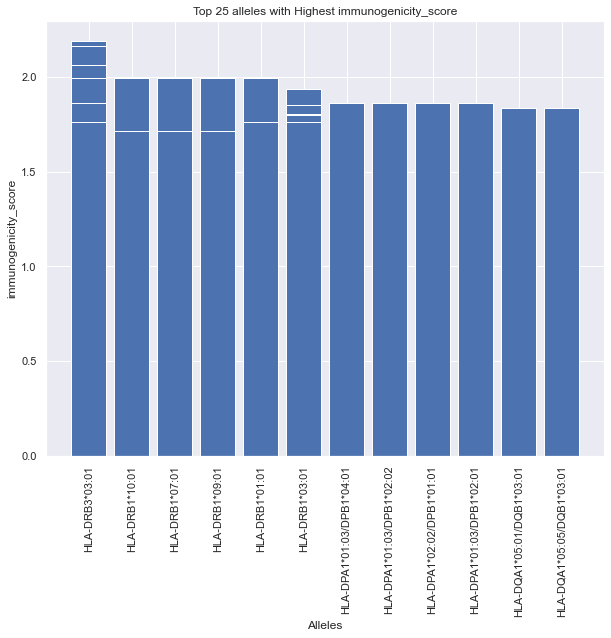

In [23]:
sorted_data = df.sort_values('antigen_score', ascending=False)
plt.figure(figsize=(10, 8))

# Get the top 25 peptides with the highest immunogenicity_score
top_25_peptides = sorted_data.head(25)[' allele']

# Plot the antigen scores of the top 25 peptides
plt.bar(top_25_peptides, sorted_data.head(25)['antigen_score'])
plt.xlabel('Alleles')
plt.ylabel('immunogenicity_score')
plt.title('Top 25 alleles with Highest immunogenicity_score')
plt.xticks(rotation=90)
plt.show()

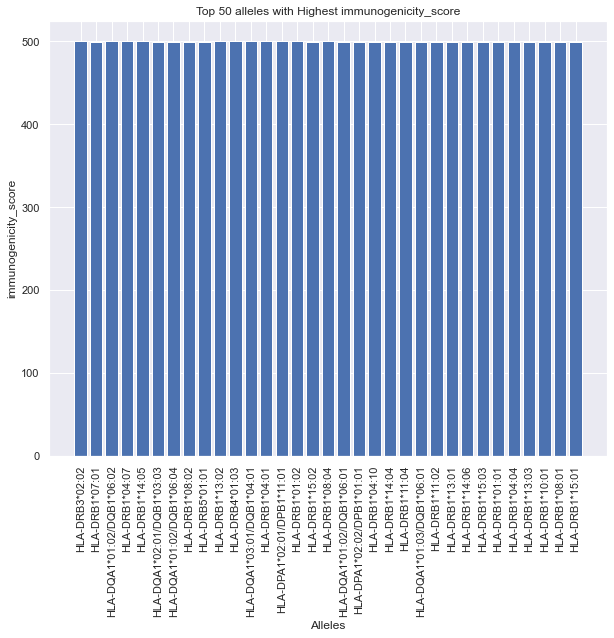

In [25]:
sorted_data = df.sort_values('iedb_aff', ascending=False)
plt.figure(figsize=(10, 8))

# Get the top 50 peptides with the highest immunogenicity_score
top_50_peptides = sorted_data.head(50)[' allele']

# Plot the antigen scores of the top 25 peptides
plt.bar(top_50_peptides, sorted_data.head(50)['iedb_aff'])
plt.xlabel('Alleles')
plt.ylabel('immunogenicity_score')
plt.title('Top 50 alleles with Highest immunogenicity_score')
plt.xticks(rotation=90)
plt.show()

In [34]:
num_features = ['population_coverage', 'genot_freq', 'genot_freq_sum_per_epitope',
       'pair_aff_score', 'aff_score', 'imm_score', 'rank_score']

In [32]:
def top10_peptides_alleles_barGraph(parameter):
    af = df.groupby(['peptide', 'allele'])[parameter].mean().sort_values(ascending = False)[:10]
    li = []
    for i in range(len(af)):
        c = ' :: '.join(af.index[i])
        li.append(c)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=li, y=af.values[:10])
    plt.title(f'Top 10 Peptides-Alleles with Highest {parameter}')
    plt.ylabel(parameter)
    plt.xticks(rotation=90)
    plt.show()

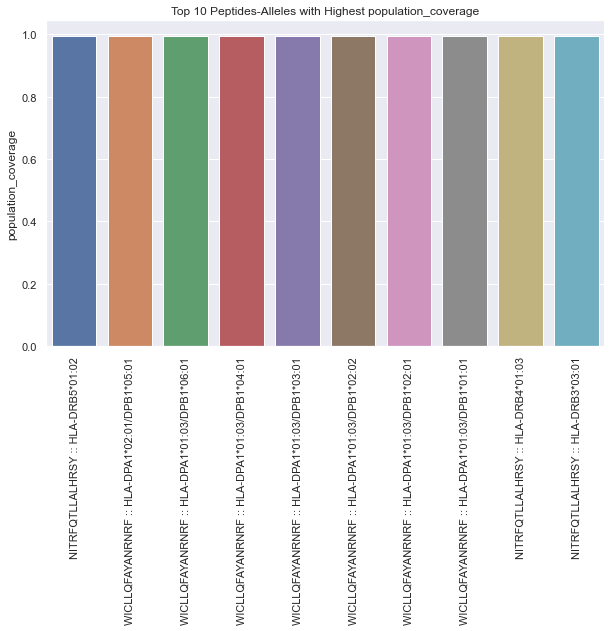

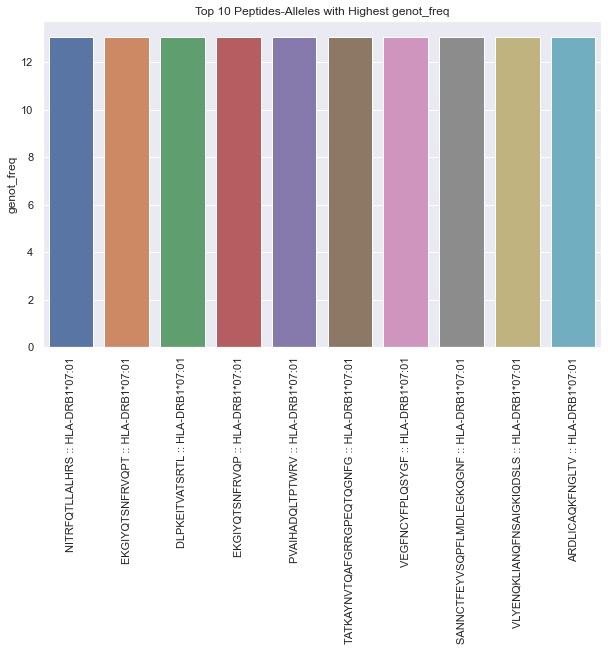

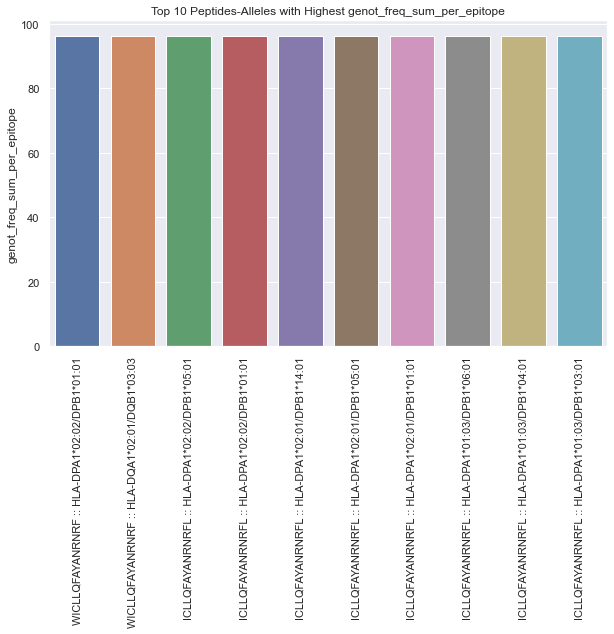

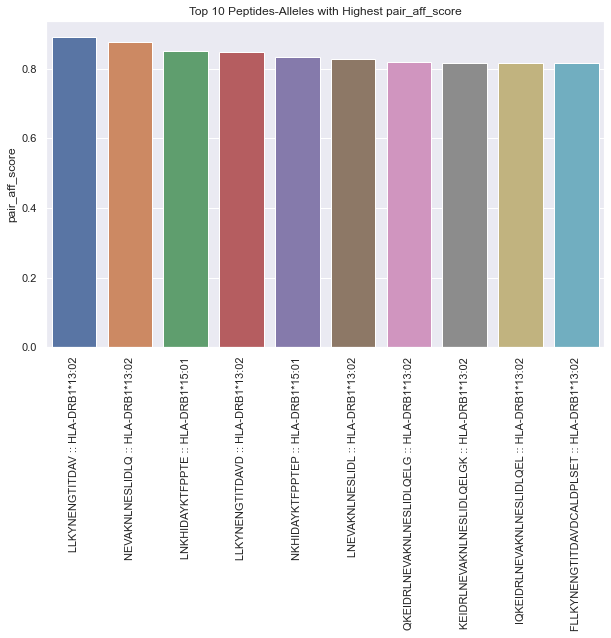

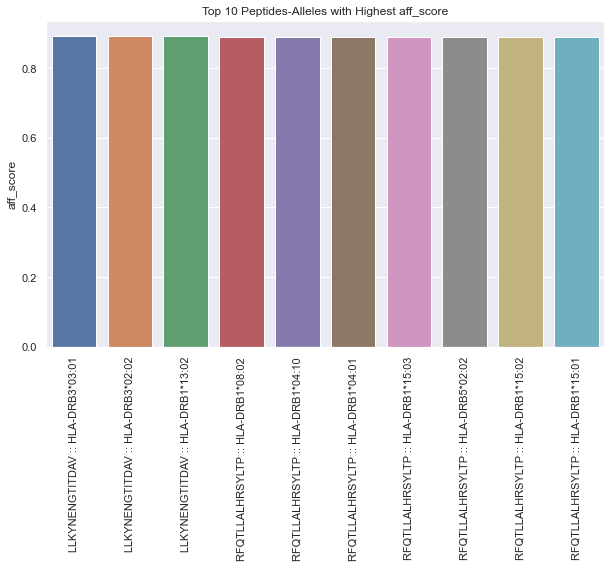

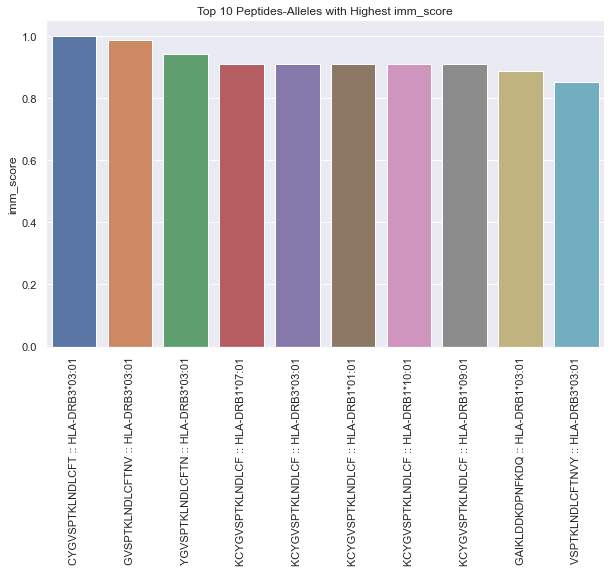

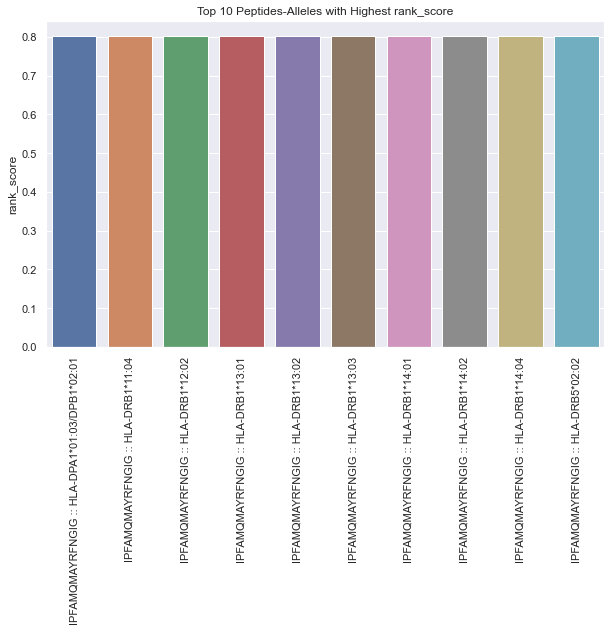

In [35]:
#important
for param in num_features:
    top10_peptides_alleles_barGraph(param)

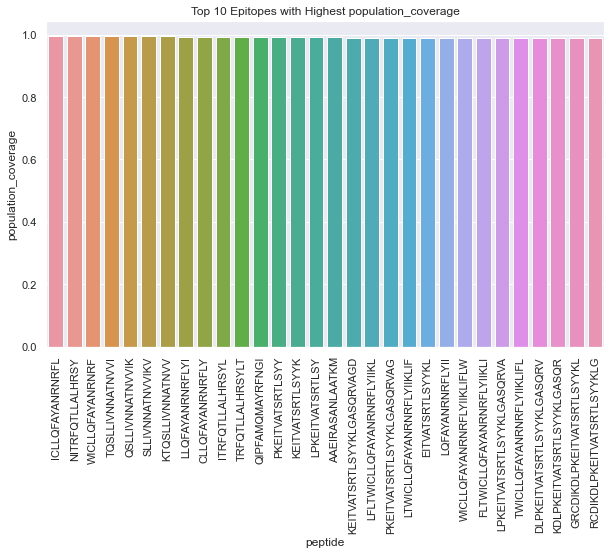

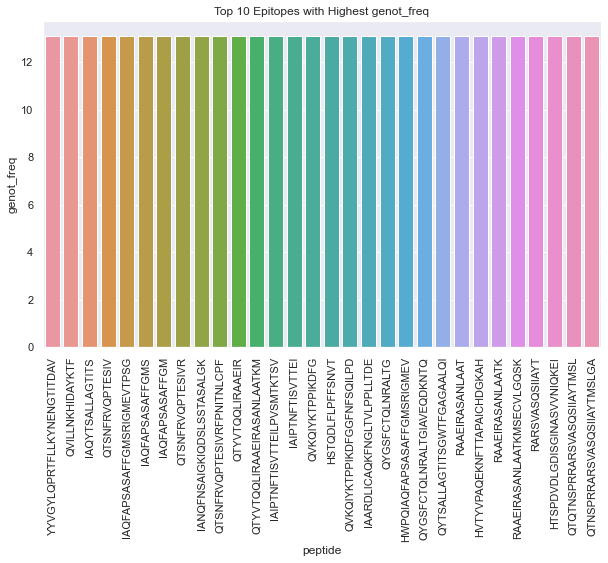

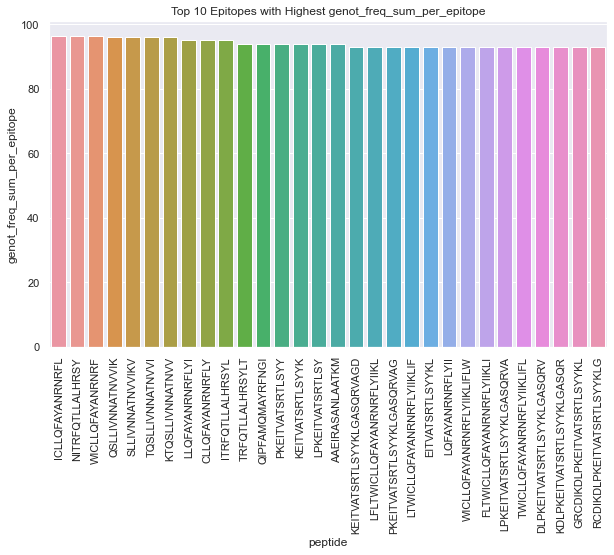

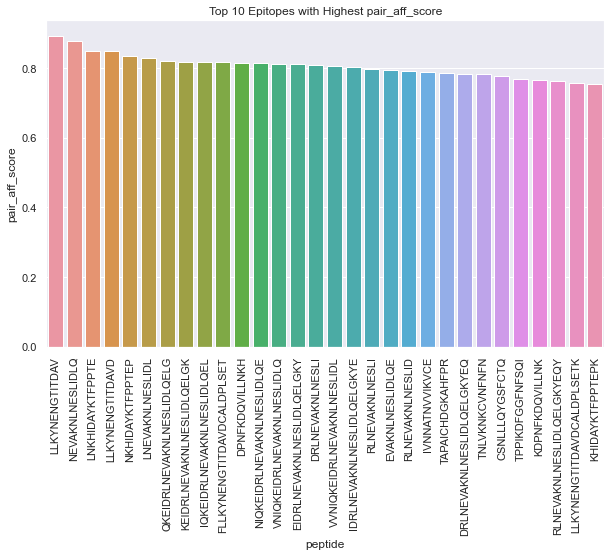

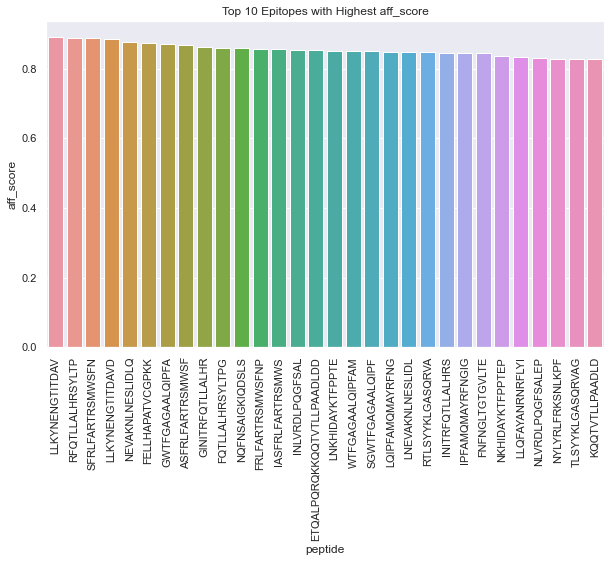

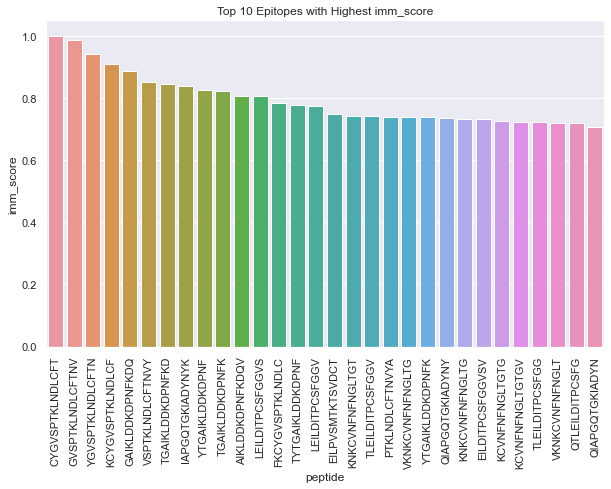

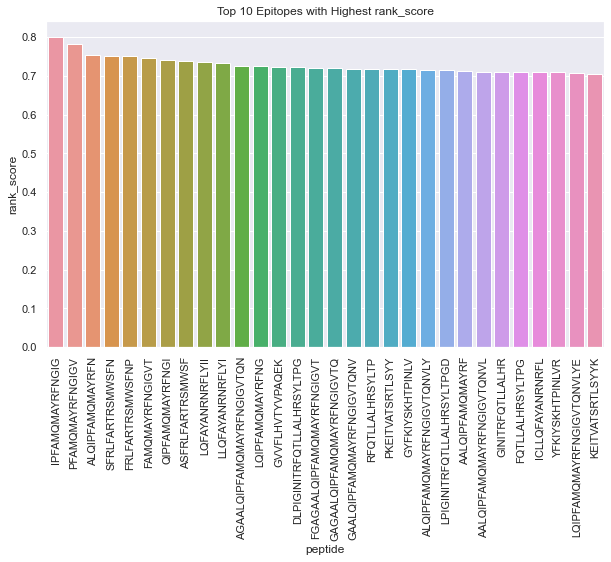

In [41]:
#important
#top30 epitopes analysis
def top30_peptides_rank_barGraph(parameter):
    af = df.groupby(['peptide'])[parameter].max().sort_values(ascending = False)[:30]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=af.index[:30], y=af[:30])
    plt.title(f'Top 10 Epitopes with Highest {parameter}')
    plt.ylabel(parameter)
    plt.xticks(rotation=90)
    plt.show()
for param in num_features:
    top30_peptides_rank_barGraph(param)

- Top ranked epitope is not in top-30 for imm score and vice versa top imm not in top ranked
- No epitopes with length 25 are in top imm score
- only 1 25aa epitope is in top aff-score, and it is not in top rank

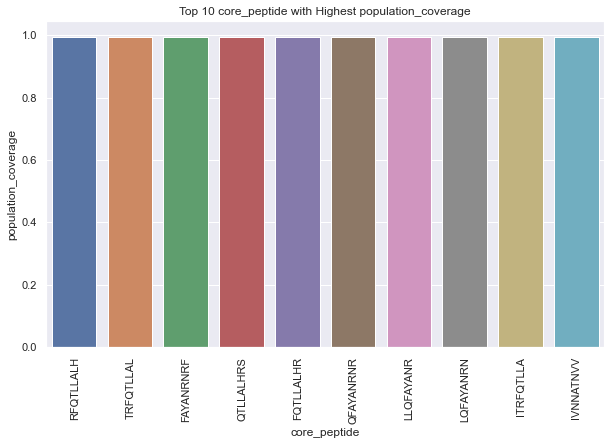

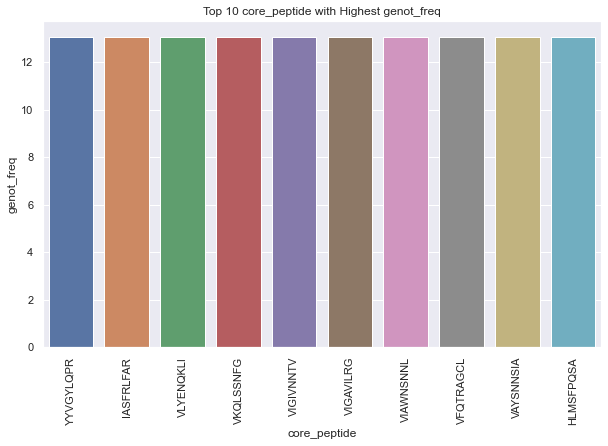

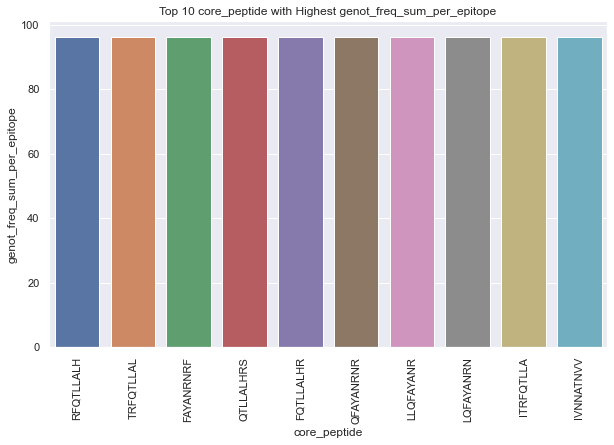

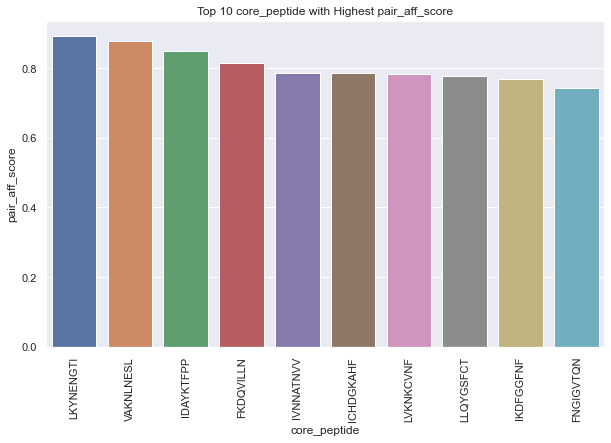

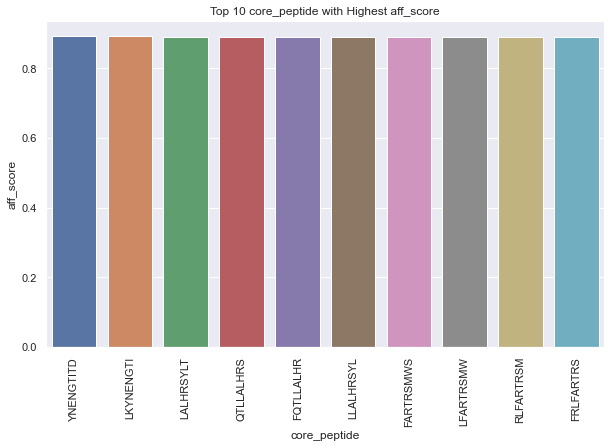

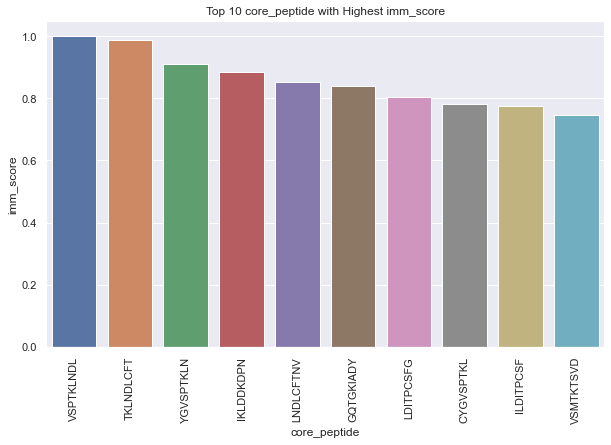

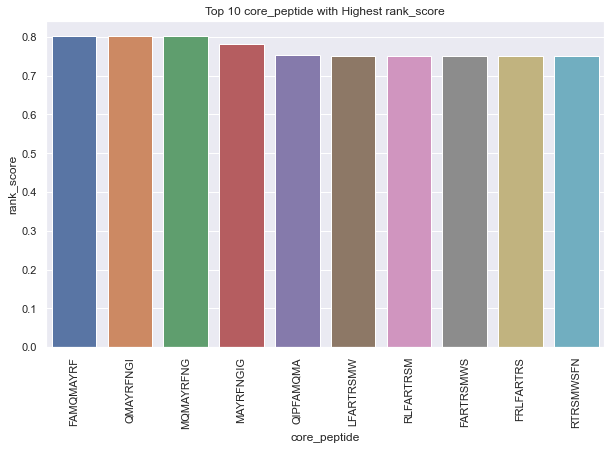

In [39]:
#core peptides
def top10_core_peptides_rank_barGraph(parameter):
    af = df.groupby(['core_peptide'])[parameter].max().sort_values(ascending = False)[:10]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=af.index[:10], y=af[:10])
    plt.title(f'Top 10 core_peptide with Highest {parameter}')
    plt.ylabel(parameter)
    plt.xticks(rotation=90)
    plt.show()
for param in num_features:
    top10_core_peptides_rank_barGraph(param)

In [ ]:
#similar as for epitopes